In [18]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [20]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# Understanding Data: Users
Users attributes of interest:
    * Sex: Categorical (Female, Male)
    * Height: Continuous 
    * Birthday: Date

## Overview of the data

In [21]:
# Read users 
with open('../data/users_all.pickle', 'rb') as f:
    users = pd.DataFrame(pickle.load(f))
users = users.dropna()
printmd('**Total umber of users: **{}'.format(len(users)))

**Total umber of users: **256547

In [22]:
# Group user settings by user_id. Check if each group length is greater than 1
not_unique = users.groupby('user_id').apply(lambda g: len(g) > 1)
# Keep only groups with more than one entry
not_unique = not_unique[not_unique]
# Number of not unique entries
printmd('**Number of non unique user_id: **{}'.format(len(not_unique)))

**Number of non unique user_id: **0

In [23]:
# Are there null values in users dataframe?
printmd('**Are there null values? **{}'.format(users.isnull().values.any()))

**Are there null values? **False

## Statistical profile of the data

### Attribute 'sex': Verify domain, visualize distribution

**Domain of attribute sex should be: **[male, female]

* _Values Found:_ ['female' 'male' '???????']

**Remove values out of the domain** [male, female]

* Number of users removed: 1

* Number of remaining users: 256546

**Distribution of users according to attribute 'sex'**

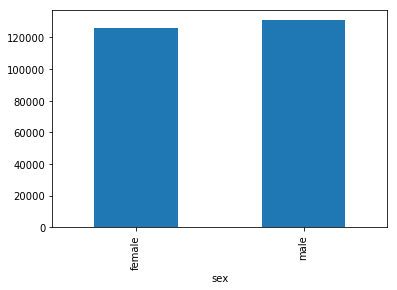

sex
female    125704
male      130842
dtype: int64


In [24]:
# Check distinct user sex values
printmd('**Domain of attribute sex should be: **[male, female]')
printmd('* _Values Found:_ {}'.format(users['sex'].unique()))

printmd('**Remove values out of the domain** [male, female]')
# Delete user entries where sex is different from male / female
len_before = len(users)
users = users[(users.sex=='female') | (users.sex=='male')]
printmd('* Number of users removed: {}'.format(len_before - len(users)))
printmd('* Number of remaining users: {}'.format(len(users)))

printmd('**Distribution of users according to attribute \'sex\'**')
# Group users by sex and plot counts
users_sex = users.groupby('sex').apply(lambda g: len(g))
users_sex.plot(kind='bar')
plt.show()
print(users_sex)

### Attribute 'height': search for outliers, visualize data variation

**Original Data:**

* _Max Height:_ 152705.0

* _Min Height:_ 0.0

* _Mean Height:_ 175.03458543886856

* _Standard Deviation:_ 322.4439112605072 

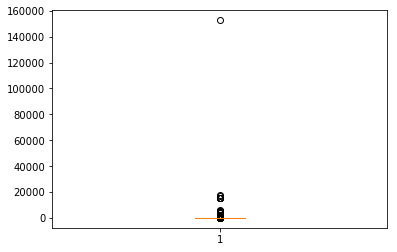

**Remove height outliers**

* Number of outliers removed: 2206

* Number of users after outliers removal: 254340

**Filtered Data:**

* _Max Height:_ 202.0

* _Min Height:_ 143.0

* _Mean Height:_ 173.04868876307305

* _Standard Deviation:_ 9.654697572079112 

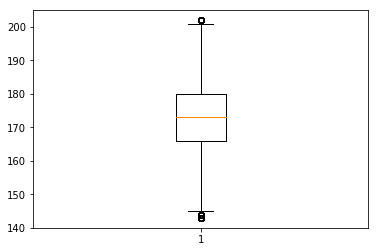

In [25]:
# Check max and min height 
printmd('**Original Data:**')
printmd('* _Max Height:_ {}'.format(users['height'].max()))
printmd('* _Min Height:_ {}'.format(users['height'].min()))
printmd('* _Mean Height:_ {}'.format(users['height'].mean()))
printmd('* _Standard Deviation:_ {} '.format(users['height'].std()))

box = plt.boxplot(users['height'], 0)

outliers = box["fliers"][0].get_data()[1]
plt.show()

printmd('**Remove height outliers**')
len_before = len(users)
users = users[-users.height.isin(outliers)]
printmd('* Number of outliers removed: {}'.format(len_before - len(users)))
printmd('* Number of users after outliers removal: {}'.format(len(users)))



printmd('**Filtered Data:**')
printmd('* _Max Height:_ {}'.format(users['height'].max()))
printmd('* _Min Height:_ {}'.format(users['height'].min()))
printmd('* _Mean Height:_ {}'.format(users['height'].mean()))
printmd('* _Standard Deviation:_ {} '.format(users['height'].std()))

box = plt.boxplot(users['height'], 0)
plt.show()

### Attribute 'Birthday': search for outliers, visualize data variation

**Original Data**

* _Max birthyear:_ 2017

* _Min birthyear:_ 1

* _Mean birthyear:_ 1969.0735079028073

* _Standard deviation:_ 110.20267378111686

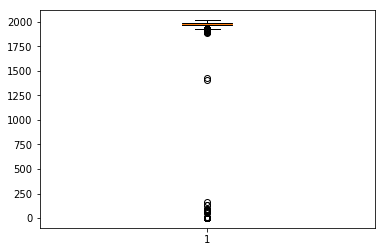

**Remove birthday outliers**

* Number of users removed:  1027
* Number of users after outliers removal: 253313


**Filtered Data**

* _Max birthyear:_ 2017

* _Min birthyear:_ 1931

* _Mean birthyear:_ 1975.1918496089818

* _Standard deviation:_ 14.581161175641729

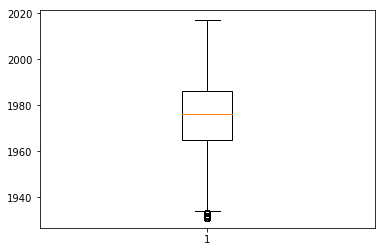

In [26]:
# Check users birthday year
users['birthyear'] = users['birthday'].apply(lambda x: x.year)
printmd('**Original Data**')
printmd('* _Max birthyear:_ {}'.format(users['birthday'].apply(lambda x: x.year).max()))
printmd('* _Min birthyear:_ {}'.format(users['birthday'].apply(lambda x: x.year).min()))
printmd('* _Mean birthyear:_ {}'.format(users['birthday'].apply(lambda x: x.year).mean()))
printmd('* _Standard deviation:_ {}'.format(users['birthday'].apply(lambda x: x.year).std()))


# Boxplot of birthyears
box = plt.boxplot(users['birthyear'], 0)

outliers = box["fliers"][0].get_data()[1]
plt.show()

#Remove outliers
len_before = len(users)
printmd('**Remove birthday outliers**')
users = users[-users.birthyear.isin(outliers)]
print('* Number of users removed: ', len_before - len(users))
print('* Number of users after outliers removal: {}'.format(len(users)))

printmd('**Filtered Data**')
printmd('* _Max birthyear:_ {}'.format(users['birthday'].apply(lambda x: x.year).max()))
printmd('* _Min birthyear:_ {}'.format(users['birthday'].apply(lambda x: x.year).min()))
printmd('* _Mean birthyear:_ {}'.format(users['birthday'].apply(lambda x: x.year).mean()))
printmd('* _Standard deviation:_ {}'.format(users['birthday'].apply(lambda x: x.year).std()))

box = plt.boxplot(users['birthyear'], 0)
plt.show()

### Histograms of filtered data

**Users sex distribution**

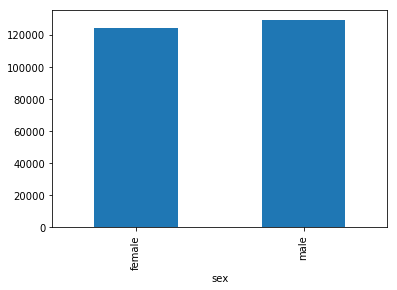

sex
female    124327
male      128986
dtype: int64


In [27]:
# Group users by sex and plot counts
printmd('**Users sex distribution**')
users_sex = users.groupby('sex').apply(lambda g: len(g))
users_sex.plot(kind='bar')
plt.show()
print(users_sex)

**Users height distribution**

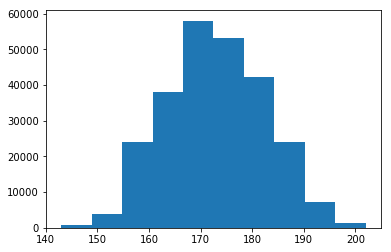

In [28]:
# Users height Histogram
printmd('**Users height distribution**')
n, bins, patches = plt.hist(
    list(users['height'].values), bins = 10)
plt.show()

**Users birthday distribution**

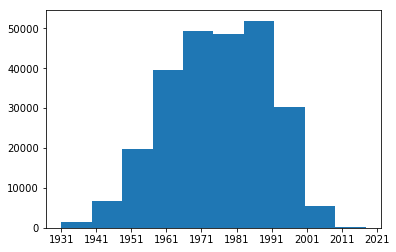

In [29]:
# Users birthday Histogram
printmd('**Users birthday distribution**')
n, bins, patches = plt.hist(
    list(users['birthday'].values), bins = 10)
plt.show()

In [30]:
# Save user filter
with open('../data/filtered/users_filter.pickle', 'wb') as f:
    pickle.dump(users, f)